# Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis

from scipy.stats import pearsonr

# Load data

In [2]:
# Raw data
df = pd.read_excel('../../RawData/RawData_240216to240220.xlsx', sheet_name=1, header=0, index_col=0)
df.head()

,START,END,TIME,F1,F2t1,F3,SC1,Q1,Q2,Q3,...,Q22,Q23t1,Q24,Q25t1,Q26,Q27t1,Q28,Q29t1,STA,GATE
MID,,,,,,,,,,,,,,,,,,,,,
1.0,2024/02/16-12:21:41,2024/02/16-12:23:24,0:01:43,2.0,32.0,41.0,1.0,4.0,3.0,2.0,...,4.0,なし,4.0,なし,4.0,なし,3.0,なし,COMP,4.0
2.0,2024/02/16-12:21:18,2024/02/16-12:24:31,0:03:13,1.0,45.0,28.0,1.0,5.0,3.0,2.0,...,1.0,回答なし,4.0,回答なし,7.0,回答なし,6.0,回答なし,COMP,5.0
3.0,2024/02/16-12:22:51,2024/02/16-12:24:44,0:01:53,1.0,41.0,27.0,1.0,2.0,3.0,2.0,...,3.0,回答なし,3.0,回答なし,3.0,回答なし,3.0,回答なし,COMP,2.0
4.0,2024/02/16-12:22:23,2024/02/16-12:25:25,0:03:02,1.0,25.0,13.0,1.0,4.0,3.0,2.0,...,1.0,回答なし,7.0,回答なし,2.0,回答なし,7.0,回答なし,COMP,4.0
5.0,2024/02/16-12:23:21,2024/02/16-12:25:38,0:02:17,1.0,36.0,28.0,1.0,2.0,4.0,2.0,...,6.0,見かけただけだから,2.0,見てても文句言われない,5.0,見るのは許してくれる,3.0,あんまり反応がない,COMP,9.0


In [3]:
# Rename variables
var_df = pd.read_excel('../../Materials/variables.xlsx', sheet_name=1, header=0, index_col=None)
var_dict = dict(zip(var_df['name1'], var_df['name2']))
df = df.rename(columns=var_dict)
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1.0,2024/02/16-12:21:41,2024/02/16-12:23:24,0:01:43,2.0,32.0,41.0,1.0,4.0,3.0,2.0,...,4.0,なし,4.0,なし,4.0,なし,3.0,なし,COMP,4.0
2.0,2024/02/16-12:21:18,2024/02/16-12:24:31,0:03:13,1.0,45.0,28.0,1.0,5.0,3.0,2.0,...,1.0,回答なし,4.0,回答なし,7.0,回答なし,6.0,回答なし,COMP,5.0
3.0,2024/02/16-12:22:51,2024/02/16-12:24:44,0:01:53,1.0,41.0,27.0,1.0,2.0,3.0,2.0,...,3.0,回答なし,3.0,回答なし,3.0,回答なし,3.0,回答なし,COMP,2.0
4.0,2024/02/16-12:22:23,2024/02/16-12:25:25,0:03:02,1.0,25.0,13.0,1.0,4.0,3.0,2.0,...,1.0,回答なし,7.0,回答なし,2.0,回答なし,7.0,回答なし,COMP,4.0
5.0,2024/02/16-12:23:21,2024/02/16-12:25:38,0:02:17,1.0,36.0,28.0,1.0,2.0,4.0,2.0,...,6.0,見かけただけだから,2.0,見てても文句言われない,5.0,見るのは許してくれる,3.0,あんまり反応がない,COMP,9.0


In [4]:
# check variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 1.0 to nan
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start                        924 non-null    object 
 1   end                          924 non-null    object 
 2   rt                           924 non-null    object 
 3   self_sex                     928 non-null    float64
 4   self_age                     926 non-null    float64
 5   residence                    924 non-null    float64
 6   participation                924 non-null    float64
 7   IOS_score                    924 non-null    float64
 8   target_likedislike           924 non-null    float64
 9   target_sex                   924 non-null    float64
 10  target_age                   924 non-null    float64
 11  relationship                 924 non-null    object 
 12  self_tolerance_score         924 non-null    float64
 13  self_tolerance_text    

# Psychometrics 1: before data exclusion

1. Reliability coefficients for the scores analyzed, with estimates of convergent and discriminant validity
2. Estimates related to the reliability of measures, including
    - (interrater reliability for subjectively scored measures and ratings)
    - (test-re-test coefficients in longitudinal studies)
    - internal consistency coefficients for composite scales in which these indices are appropriate for understanding the nature of the instruments being used in the study.
3. Normality??
    - 残差プロット
    - Q-Q plot
    - root square of residual plot
    - leverage

## IOS scale

In [5]:
df.groupby('IOS_score').size()

IOS_score
1.0    132
2.0    132
3.0    132
4.0    132
5.0    132
6.0    132
7.0    132
dtype: int64

## Trait adjective scores (self)

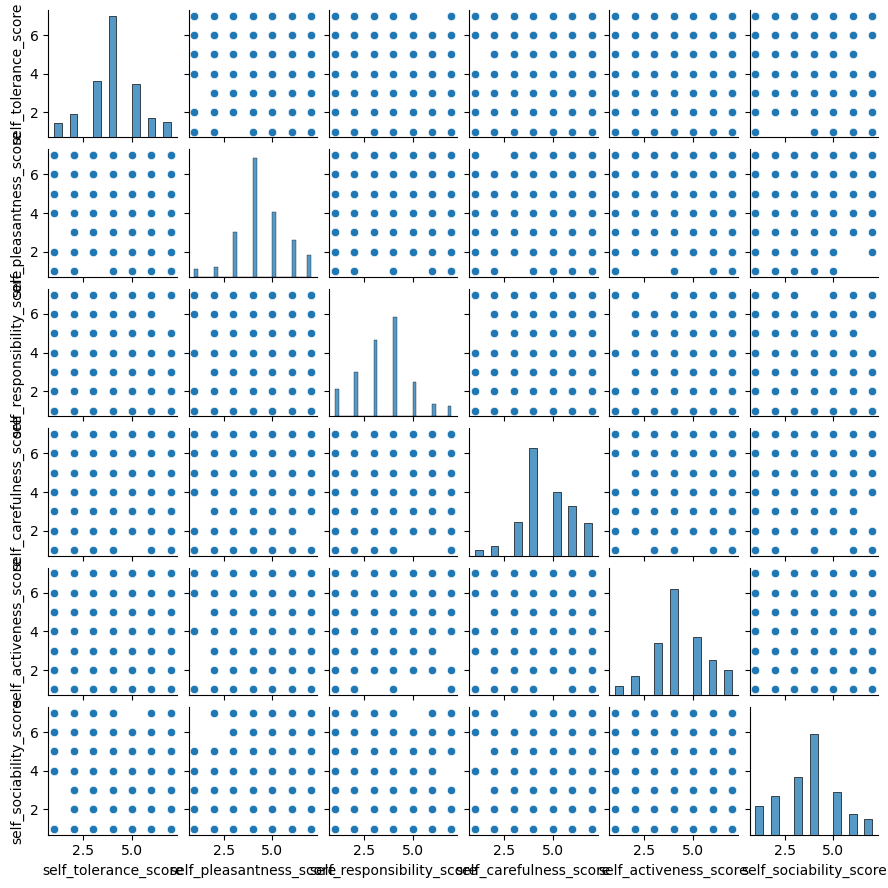

In [9]:
df_trait_score_self = df[["self_tolerance_score", "self_pleasantness_score",
                          "self_responsibility_score", "self_carefulness_score",
                          "self_activeness_score", "self_sociability_score"]]
sns.pairplot(df_trait_score_self, height=1.5)
#sns.pairplot(df_trait_score_self, diag_kind=sns.histplot, diag_kws={'bins': 7, 'width': 1}, plot_kws={'alpha': 0.5})
plt.show()

In [10]:
corr_self = df_trait_score_self.corr()
corr_self.head(6)

,self_tolerance_score,self_pleasantness_score,self_responsibility_score,self_carefulness_score,self_activeness_score,self_sociability_score
self_tolerance_score,1.000000,-0.330124,0.311135,-0.086474,0.368510,-0.260243
self_pleasantness_score,-0.330124,1.000000,-0.213780,0.391164,-0.209007,0.407906
self_responsibility_score,0.311135,-0.213780,1.000000,-0.292981,0.256788,-0.080872
self_carefulness_score,-0.086474,0.391164,-0.292981,1.000000,0.054062,0.126566
self_activeness_score,0.368510,-0.209007,0.256788,0.054062,1.000000,-0.383387
self_sociability_score,-0.260243,0.407906,-0.080872,0.126566,-0.383387,1.000000


<Axes: >

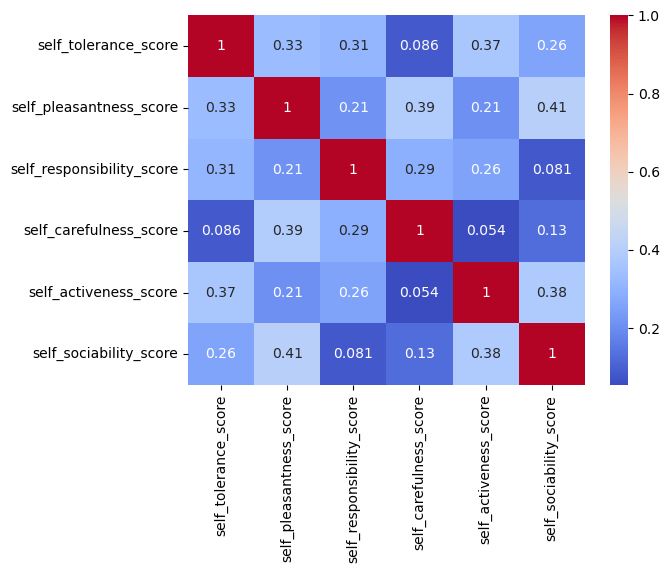

In [11]:
sns.heatmap(corr_self.abs(), annot=True, cmap='coolwarm')

In [47]:
fa = FactorAnalysis(n_components=3, rotation='varimax')
df_transformed_self = fa.fit_transform(df_trait_score_self)

ValueError: Input X contains NaN.
FactorAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Trait adjective scores (target)

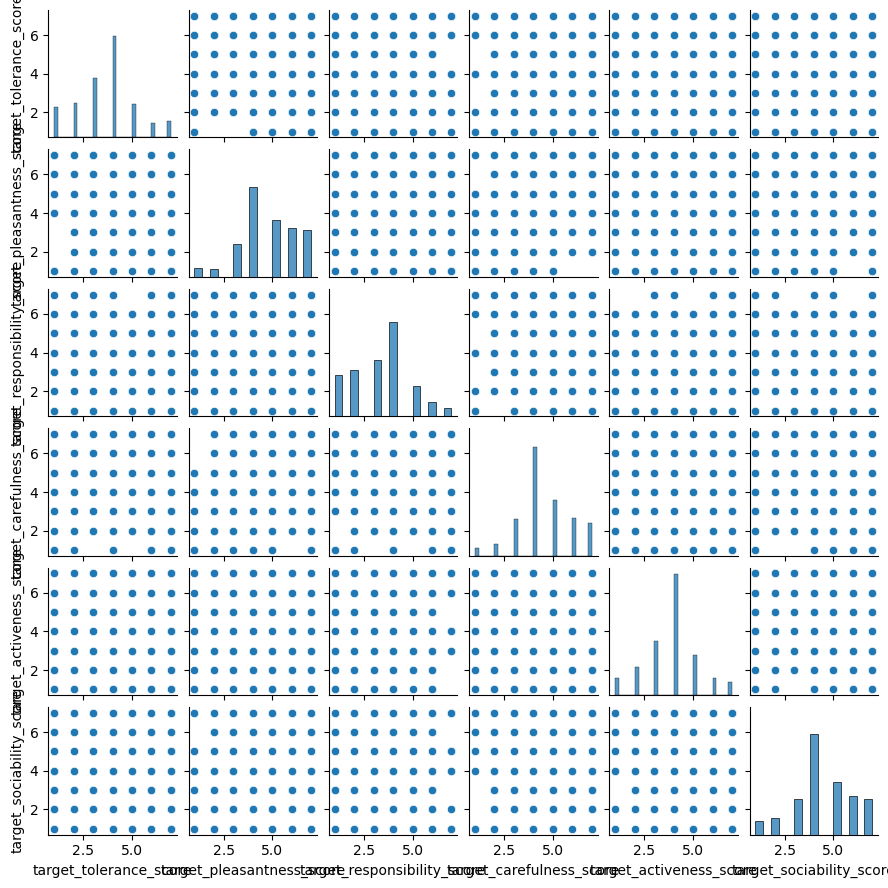

In [12]:
df_trait_score_target = df[["target_tolerance_score", "target_pleasantness_score",
                            "target_responsibility_score", "target_carefulness_score",
                            "target_activeness_score", "target_sociability_score"]]
sns.pairplot(df_trait_score_target, height=1.5)
#sns.pairplot(df_trait_score_self, diag_kind=sns.histplot, diag_kws={'bins': 7, 'width': 1}, plot_kws={'alpha': 0.5})
plt.show()

In [13]:
corr_target = df_trait_score_target.corr()
corr_target.head(6)

,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score
target_tolerance_score,1.000000,-0.467989,0.505179,-0.270744,0.343862,-0.223867
target_pleasantness_score,-0.467989,1.000000,-0.382442,0.439459,-0.202054,0.386485
target_responsibility_score,0.505179,-0.382442,1.000000,-0.398090,0.338131,-0.208724
target_carefulness_score,-0.270744,0.439459,-0.398090,1.000000,-0.023329,0.224485
target_activeness_score,0.343862,-0.202054,0.338131,-0.023329,1.000000,-0.293541
target_sociability_score,-0.223867,0.386485,-0.208724,0.224485,-0.293541,1.000000


<Axes: >

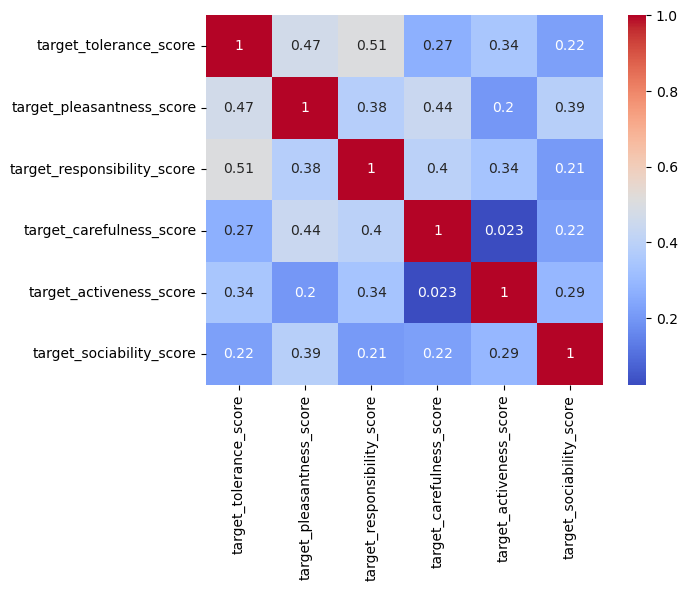

In [14]:
sns.heatmap(corr_target.abs(), annot=True, cmap='coolwarm')

## Trait adjective scores (self; target)

In [15]:
df_trait_score = df_trait_score_self.merge(df_trait_score_target, left_index=True, right_index=True)
df_trait_score.head()

,self_tolerance_score,self_pleasantness_score,self_responsibility_score,self_carefulness_score,self_activeness_score,self_sociability_score,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score
MID,,,,,,,,,,,,
1.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0
2.0,3.0,4.0,3.0,4.0,5.0,2.0,6.0,5.0,1.0,4.0,7.0,6.0
3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0
4.0,1.0,7.0,1.0,7.0,3.0,4.0,1.0,6.0,1.0,7.0,2.0,7.0
5.0,3.0,4.0,5.0,3.0,4.0,2.0,5.0,3.0,6.0,2.0,5.0,3.0


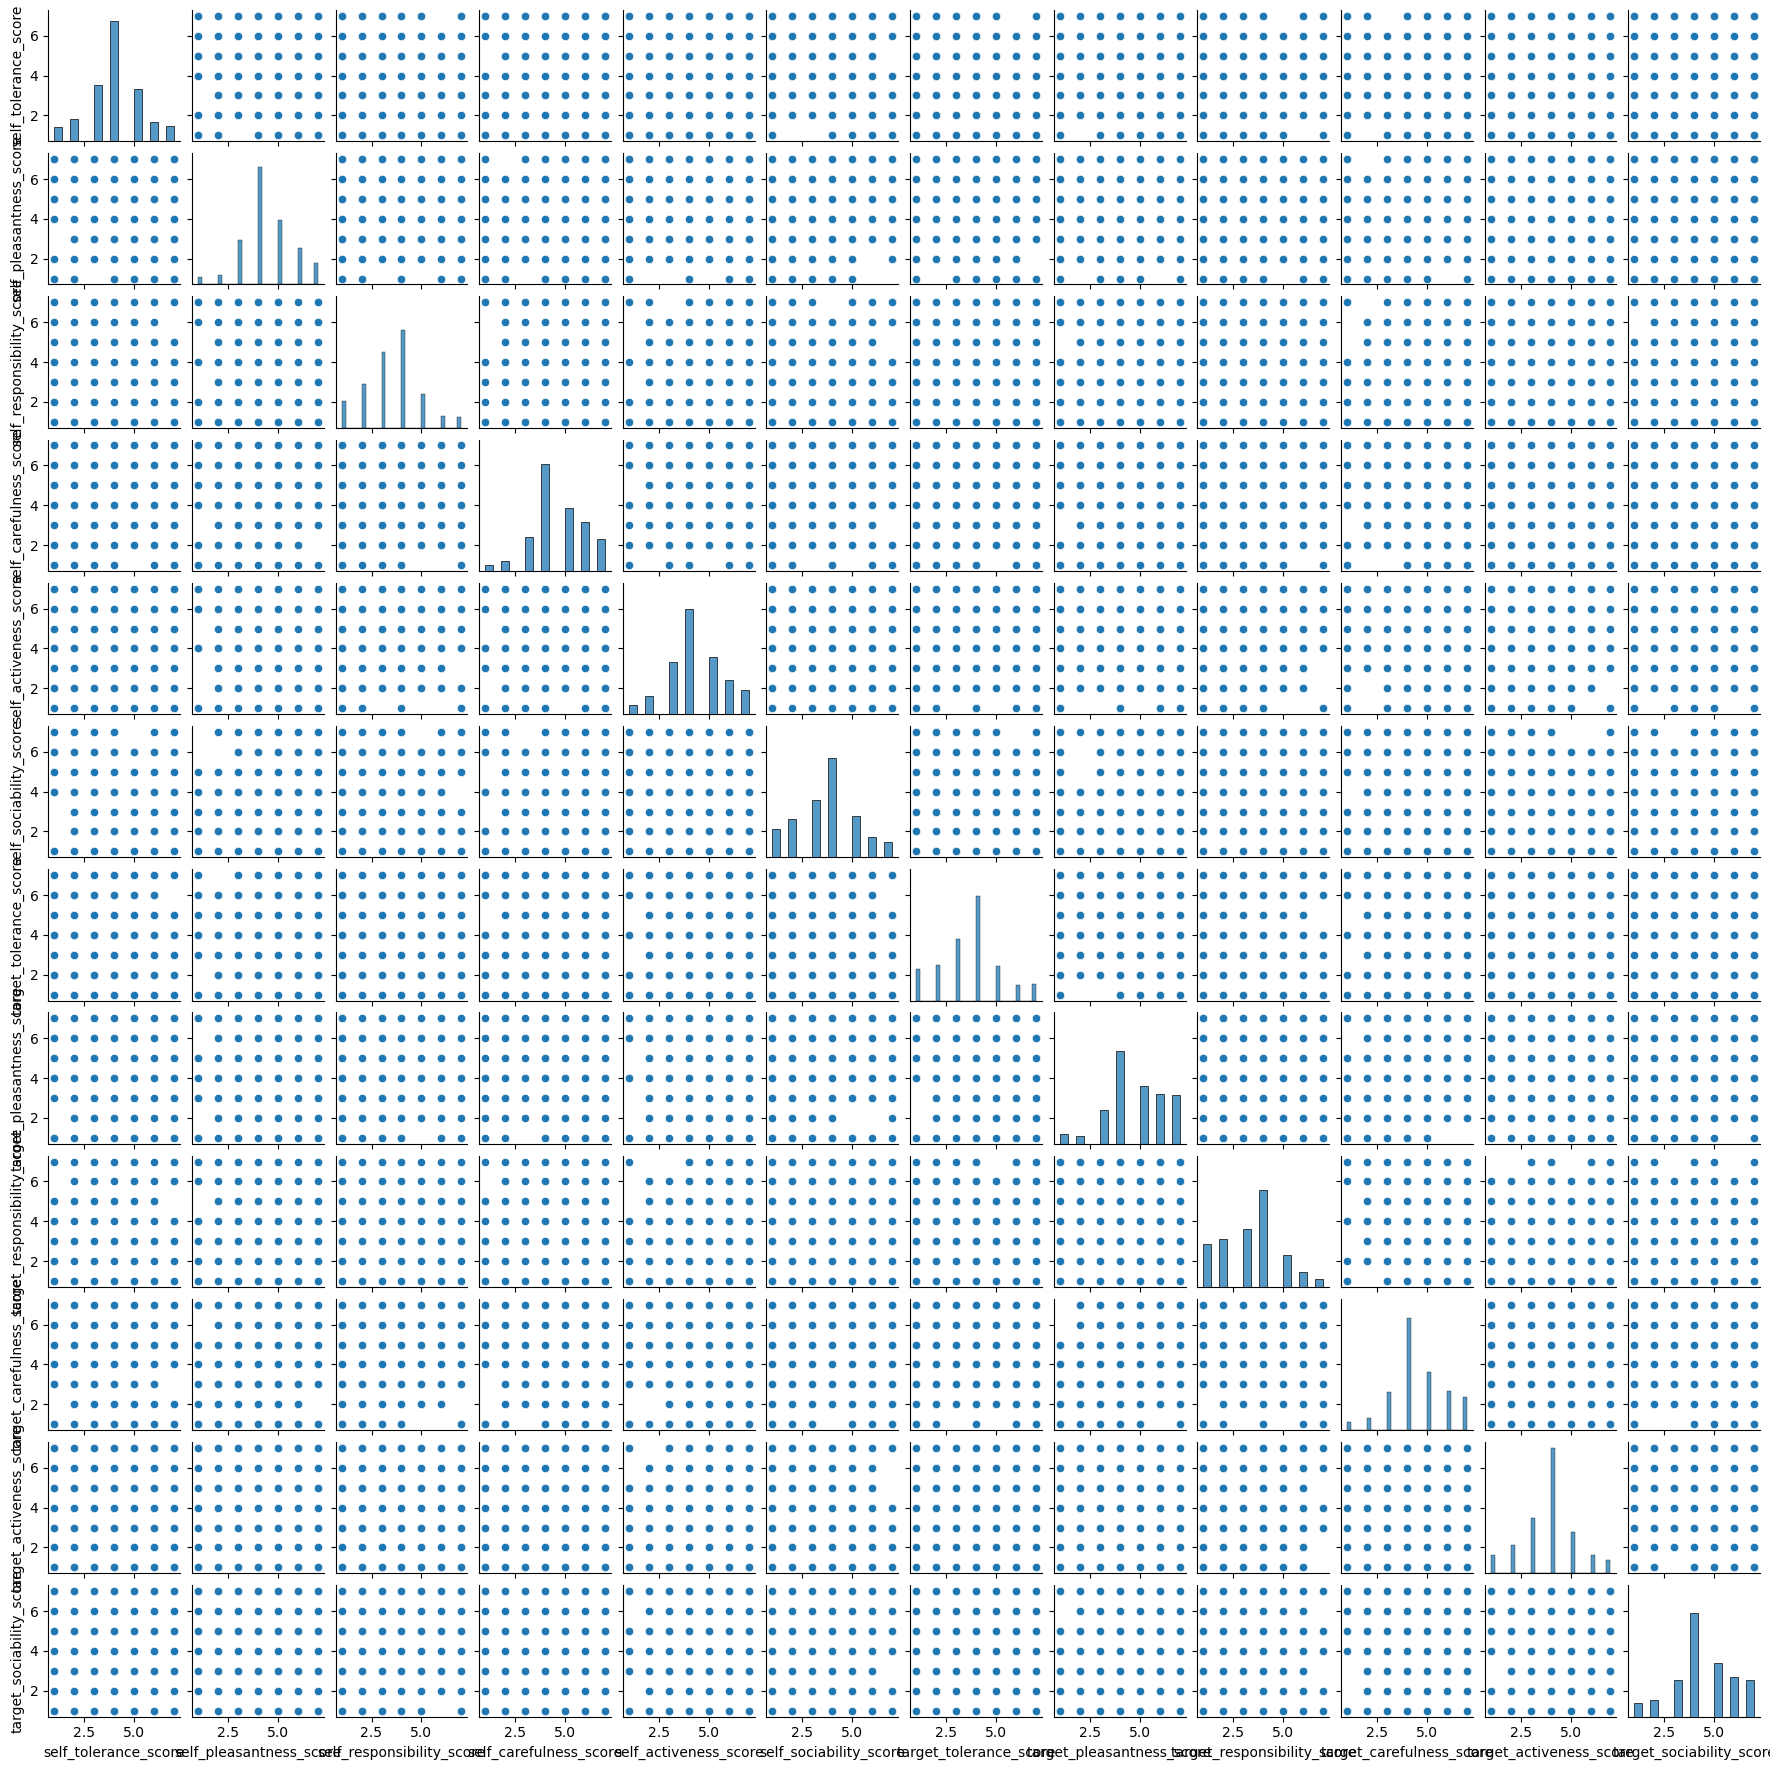

In [16]:
sns.pairplot(df_trait_score, height=1.5)
#sns.pairplot(df_trait_score_self, diag_kind=sns.histplot, diag_kws={'bins': 7, 'width': 1}, plot_kws={'alpha': 0.5})
plt.show()

In [17]:
corr_trait = df_trait_score.corr()
corr_trait.head(12)

,self_tolerance_score,self_pleasantness_score,self_responsibility_score,self_carefulness_score,self_activeness_score,self_sociability_score,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score
self_tolerance_score,1.000000,-0.330124,0.311135,-0.086474,0.368510,-0.260243,0.202479,-0.117887,0.204571,-0.068266,0.166342,-0.022477
self_pleasantness_score,-0.330124,1.000000,-0.213780,0.391164,-0.209007,0.407906,-0.107778,0.353684,-0.153008,0.264220,0.004491,0.146960
self_responsibility_score,0.311135,-0.213780,1.000000,-0.292981,0.256788,-0.080872,0.222083,-0.124345,0.322826,-0.085005,0.205282,-0.091657
self_carefulness_score,-0.086474,0.391164,-0.292981,1.000000,0.054062,0.126566,-0.078168,0.303926,-0.106738,0.177161,-0.091990,0.199913
self_activeness_score,0.368510,-0.209007,0.256788,0.054062,1.000000,-0.383387,0.188641,-0.048359,0.159352,-0.050740,0.174660,-0.012084
self_sociability_score,-0.260243,0.407906,-0.080872,0.126566,-0.383387,1.000000,-0.095711,0.193506,-0.017047,0.163251,-0.032392,0.200032
target_tolerance_score,0.202479,-0.107778,0.222083,-0.078168,0.188641,-0.095711,1.000000,-0.467989,0.505179,-0.270744,0.343862,-0.223867
target_pleasantness_score,-0.117887,0.353684,-0.124345,0.303926,-0.048359,0.193506,-0.467989,1.000000,-0.382442,0.439459,-0.202054,0.386485
target_responsibility_score,0.204571,-0.153008,0.322826,-0.106738,0.159352,-0.017047,0.505179,-0.382442,1.000000,-0.398090,0.338131,-0.208724
target_carefulness_score,-0.068266,0.264220,-0.085005,0.177161,-0.050740,0.163251,-0.270744,0.439459,-0.398090,1.000000,-0.023329,0.224485


<Axes: >

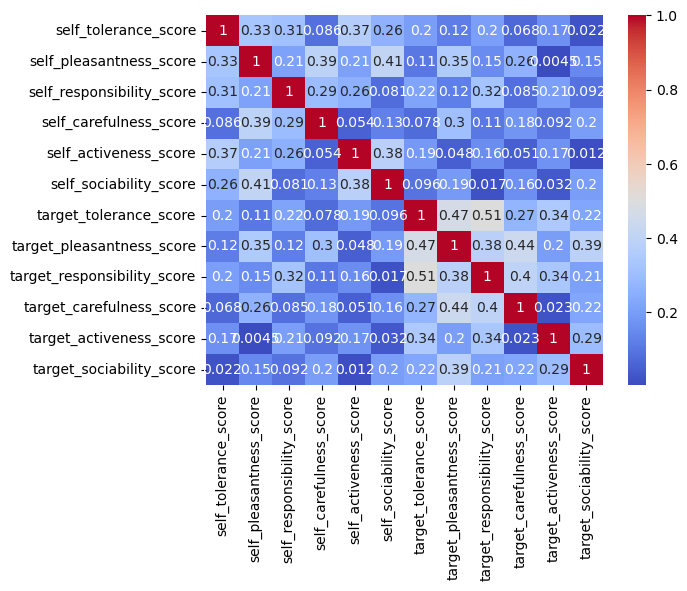

In [18]:
sns.heatmap(corr_trait.abs(), annot=True, cmap='coolwarm')

## IOS scores x Trait adjective scores (self; target)

In [21]:
df['IOS_score'].head()

MID
1.0    4.0
2.0    5.0
3.0    2.0
4.0    4.0
5.0    2.0
Name: IOS_score, dtype: float64

In [31]:
df_trait_score_self = df_trait_score_self.merge(df["IOS_score"], left_index=True, right_index=True)
df_trait_score_self.head()
# ddd = df_trait_score_self.groupby('IOS_score').describe()
#df_trait_score_self[df_trait_score_self['IOS_score']# Extract rows where 'IOS_score' is 1
df_filtered = df_trait_score_self[df_trait_score_self['IOS_score'] == 1]

df_filtered.head()

MergeError: Passing 'suffixes' which cause duplicate columns {'IOS_score_x'} is not allowed.

## Reliability coefficients

In [ ]:
def cronback_alpha(items):
    # Calculate Cronbach's alpha
    # https://en.wikipedia.org/wiki/Cronbach%27s_alpha
    item_variances = [np.var(item) for item in items]
    sample_variances = np.var(items, axis=0)

    return (len(items) / (len(items) - 1)) * (1 - (np.sum(item_variances) / np.sum(sample_variances)))

# Data Exclusion
- Participants described bellow will be excluded from the analysis.
	- They indicate their first language is not Japanese.
	- They do not complete any items in the given questionnaire.
	- They spend time less than 1.5 interquartile range (IQR) below the lower quartile (Q1) or more than 1.5 IQR above the upper quartile (Q3) on completing the questionnaire. 


In [32]:
# Participants who DID NOT complete ANY items
df = df.dropna(how='all')
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1.0,2024/02/16-12:21:41,2024/02/16-12:23:24,0:01:43,2.0,32.0,41.0,1.0,4.0,3.0,2.0,...,4.0,なし,4.0,なし,4.0,なし,3.0,なし,COMP,4.0
2.0,2024/02/16-12:21:18,2024/02/16-12:24:31,0:03:13,1.0,45.0,28.0,1.0,5.0,3.0,2.0,...,1.0,回答なし,4.0,回答なし,7.0,回答なし,6.0,回答なし,COMP,5.0
3.0,2024/02/16-12:22:51,2024/02/16-12:24:44,0:01:53,1.0,41.0,27.0,1.0,2.0,3.0,2.0,...,3.0,回答なし,3.0,回答なし,3.0,回答なし,3.0,回答なし,COMP,2.0
4.0,2024/02/16-12:22:23,2024/02/16-12:25:25,0:03:02,1.0,25.0,13.0,1.0,4.0,3.0,2.0,...,1.0,回答なし,7.0,回答なし,2.0,回答なし,7.0,回答なし,COMP,4.0
5.0,2024/02/16-12:23:21,2024/02/16-12:25:38,0:02:17,1.0,36.0,28.0,1.0,2.0,4.0,2.0,...,6.0,見かけただけだから,2.0,見てても文句言われない,5.0,見るのは許してくれる,3.0,あんまり反応がない,COMP,9.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 1.0 to nan
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start                        924 non-null    object 
 1   end                          924 non-null    object 
 2   rt                           924 non-null    object 
 3   self_sex                     928 non-null    float64
 4   self_age                     926 non-null    float64
 5   residence                    924 non-null    float64
 6   participation                924 non-null    float64
 7   IOS_score                    924 non-null    float64
 8   target_likedislike           924 non-null    float64
 9   target_sex                   924 non-null    float64
 10  target_age                   924 non-null    float64
 11  relationship                 924 non-null    object 
 12  self_tolerance_score         924 non-null    float64
 13  self_tolerance_text    

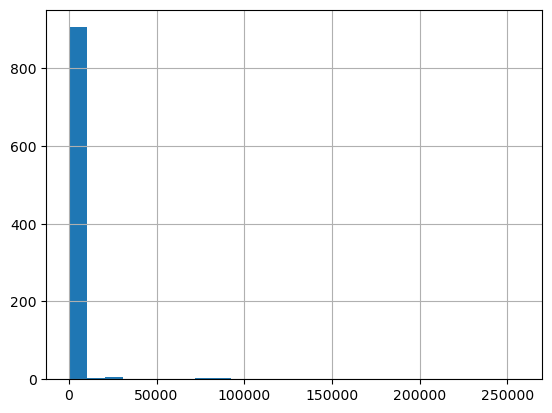

In [34]:
# Convert Datetimeindex to a numeric format
rt = pd.to_datetime(df.end) - pd.to_datetime(df.start)
df['rt'] = pd.to_timedelta(rt).dt.total_seconds()
hist = df['rt'].hist(bins=25)

In [8]:
# IQR
q1 = df['rt'].quantile(0.25)
q3 = df['rt'].quantile(0.75)
iqr = q3 - q1

# Participants who spend time less than 1.5 IQR below the lower quatile (Q1)
lower_limit = q1 - 1.5 * iqr

# Participants who spend time more than 1.5 IQR above the upper quatile (Q3)
upper_limit = q3 + 1.5 * iqr


df_low = df[df['rt'] <= lower_limit]
df_upp = df[df['rt'] >= upper_limit]


In [9]:
# Exlude outlier
df = df[df['rt'] > lower_limit]
df= df[df['rt'] < upper_limit]

df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,144.0,2,50,13,1,6,1,2,...,3,回答なし,5,回答なし,7,回答なし,7,回答なし,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,3,回答なし,3,回答なし,3,回答なし,4,回答なし,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,116.0,1,48,39,1,1,3,2,...,4,回答なし,4,回答なし,4,回答なし,4,回答なし,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


In [10]:
# added on 5/23/2023
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 1 to 181
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   start                        166 non-null    object 
 1   end                          166 non-null    object 
 2   rt                           166 non-null    float64
 3   self_sex                     166 non-null    int64  
 4   self_age                     166 non-null    int64  
 5   residence                    166 non-null    int64  
 6   participation                166 non-null    int64  
 7   IOS_score                    166 non-null    int64  
 8   target_likedislike           166 non-null    int64  
 9   target_sex                   166 non-null    int64  
 10  target_age                   166 non-null    int64  
 11  relationship                 166 non-null    object 
 12  self_tolerance_score         166 non-null    int64  
 13  self_tolerance_text      

In [11]:
# When responses to the open-ended questions are “I would not like to answer this question,” they will be excluded from the analysis.
# df = df.replace('答えない', '') # deleted on 5/23/2023
df = df.replace(['回答なし', '回答無し'], '') # added on 5/23/2023
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,target_responsibility_score,target_responsibility_text,target_carefulness_score,target_carefulness_text,target_activeness_score,target_activeness_text,target_sociability_score,target_sociability_text,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,144.0,2,50,13,1,6,1,2,...,3,,5,,7,,7,,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,3,,3,,3,,4,,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,2,仕事を抱え込む,7,チェックが細かい,7,基本受け身,2,話が下手,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,116.0,1,48,39,1,1,3,2,...,4,,4,,4,,4,,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,ない,4,ない,3,なし,4,なし,COMP,2


# Output
Save:
- Text data as txt
- Data frame as xlsx

## Text Data

In [12]:
text_vars_self = [
	'self_tolerance_text',
	'self_pleasantness_text',
	'self_responsibility_text',
	'self_carefulness_text',
	'self_activeness_text',
	'self_sociability_text']

text_vars_target = [
	'target_tolerance_text',
	'target_pleasantness_text',
	'target_responsibility_text',
	'target_carefulness_text',
	'target_activeness_text',
	'target_sociability_text']

In [13]:
text_vars_self

['self_tolerance_text',
 'self_pleasantness_text',
 'self_responsibility_text',
 'self_carefulness_text',
 'self_activeness_text',
 'self_sociability_text']

In [14]:
text_vars_target

['target_tolerance_text',
 'target_pleasantness_text',
 'target_responsibility_text',
 'target_carefulness_text',
 'target_activeness_text',
 'target_sociability_text']

In [15]:
print(text_vars_self + text_vars_target)

['self_tolerance_text', 'self_pleasantness_text', 'self_responsibility_text', 'self_carefulness_text', 'self_activeness_text', 'self_sociability_text', 'target_tolerance_text', 'target_pleasantness_text', 'target_responsibility_text', 'target_carefulness_text', 'target_activeness_text', 'target_sociability_text']


In [16]:
text_vars_all =  text_vars_self + text_vars_target
df.loc[:, text_vars_all].head()

,self_tolerance_text,self_pleasantness_text,self_responsibility_text,self_carefulness_text,self_activeness_text,self_sociability_text,target_tolerance_text,target_pleasantness_text,target_responsibility_text,target_carefulness_text,target_activeness_text,target_sociability_text
MID,,,,,,,,,,,,
1,,,,,,,,,,,,
2,,愛想がない,,,,,,,,,,
3,怒ったことがない,よく道を聞かれる,世話好きでリーダー肌,計画する前に動く,行動力がある,友達がいない,怒らない,優しそうでお人好し,仕事を抱え込む,チェックが細かい,基本受け身,話が下手
4,,,,,,,,,,,,
5,ない,遊んでいて楽しい,ない,ない,なし,なし,ない,なし,ない,ない,なし,なし


In [17]:
filename = './Results/output01_all.txt'
with open(filename, 'w') as f:
	df_string = df.loc[:, text_vars_all].to_string(header=False, index=False)
	f.write(df_string)

In [18]:
filename = './Results/output01_self.txt'
with open(filename, 'w') as f:
	df_string = df.loc[:, text_vars_self].to_string(header=False, index=False)
	f.write(df_string)

In [19]:
filename = './Results/output01_target.txt'
with open(filename, 'w') as f:
	df_string = df.loc[:, text_vars_target].to_string(header=False, index=False)
	f.write(df_string)

## Data Frame

In [20]:
df.drop(text_vars_all, axis='columns', inplace=True)
df.head()

,start,end,rt,self_sex,self_age,residence,participation,IOS_score,target_likedislike,target_sex,...,self_activeness_score,self_sociability_score,target_tolerance_score,target_pleasantness_score,target_responsibility_score,target_carefulness_score,target_activeness_score,target_sociability_score,completion,stratumID
MID,,,,,,,,,,,,,,,,,,,,,
1,2023/05/19-12:49:32,2023/05/19-12:51:56,144.0,2,50,13,1,6,1,2,...,3,7,7,7,3,5,7,7,COMP,6
2,2023/05/19-12:49:10,2023/05/19-12:52:07,177.0,1,40,7,1,5,2,2,...,2,2,5,5,3,3,3,4,COMP,5
3,2023/05/19-12:49:28,2023/05/19-12:55:05,337.0,2,40,23,1,2,2,1,...,1,2,1,7,2,7,7,2,COMP,2
4,2023/05/19-12:55:11,2023/05/19-12:57:07,116.0,1,48,39,1,1,3,2,...,4,4,4,3,4,4,4,4,COMP,1
5,2023/05/19-12:54:24,2023/05/19-12:57:31,187.0,1,46,18,1,2,3,1,...,4,4,3,5,4,4,3,4,COMP,2


In [21]:
filename = './Results/output01_all.csv'
df.to_csv(filename, index=True)